<a href="https://colab.research.google.com/github/AbhishekBangde/Aerofit-Sales-Analysis-using-Descriptive-Statistics-and-Probability/blob/main/Aerofit_Sales_Analysis_using_Descriptive_Statistics_and_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Case: Aerofit**

### This is a Case Study on Aerofit  in Python.

### Lets start with importing essential libraries like - pandas, numpy, pyplot in mathplotlib and seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Processing

### Now lets proceed and upload the Aerofit raw dataset to the notebook

In [2]:
url = 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749'
df = pd.read_csv(url) #reads the datalink in url and assigns a varivale name df to dataset

### Lets look around the data structure for some generic lookout

In [3]:
df.head() #shows the first 5 rows of dataset

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


### Now lets see the number of rows and columns to further understand the dataset

In [4]:
df.shape #gives number of rows and columns in dataset

(180, 9)

### Since there are 180 rows and 9 columns in the dataset, lets check the Non Null Count and datatype information of the columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


### As we see there are no null values, in any of the columns and all the assigned datatypes are correct therefore there is no need of editing the datatypes or treating the nulls.   

### Since we see there are some columns which are not clear by names , lets rename them

In [6]:
df.rename({'Education':'Education(in yrs)','Usage':'Usage(avg per week)','Fitness':'Fitness level','Income':'Annual Income(in $)','Miles':'Miles(avg per week)'},axis=1,inplace=True) #renaming the columns

In [7]:
df

,Product,Age,Gender,Education(in yrs),MaritalStatus,Usage(avg per week),Fitness level,Annual Income(in $),Miles(avg per week)
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


### Now lets create a new column named 'Selling Price' to decribe the selling price for each product as given in project description.

In [8]:
df.loc[df['Product'] == 'KP281', 'Selling Price(in $)'] = 1500
df.loc[df['Product'] == 'KP481', 'Selling Price(in $)'] = 1750
df.loc[df['Product'] == 'KP781', 'Selling Price(in $)'] = 2500
df #defining the selling price for each product and adding a new column for the same

,Product,Age,Gender,Education(in yrs),MaritalStatus,Usage(avg per week),Fitness level,Annual Income(in $),Miles(avg per week),Selling Price(in $)
0,KP281,18,Male,14,Single,3,4,29562,112,1500.0
1,KP281,19,Male,15,Single,2,3,31836,75,1500.0
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500.0
3,KP281,19,Male,12,Single,3,3,32973,85,1500.0
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500.0
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,2500.0
176,KP781,42,Male,18,Single,5,4,89641,200,2500.0
177,KP781,45,Male,16,Single,5,5,90886,160,2500.0
178,KP781,47,Male,18,Partnered,4,5,104581,120,2500.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product              180 non-null    object 
 1   Age                  180 non-null    int64  
 2   Gender               180 non-null    object 
 3   Education(in yrs)    180 non-null    int64  
 4   MaritalStatus        180 non-null    object 
 5   Usage(avg per week)  180 non-null    int64  
 6   Fitness level        180 non-null    int64  
 7   Annual Income(in $)  180 non-null    int64  
 8   Miles(avg per week)  180 non-null    int64  
 9   Selling Price(in $)  180 non-null    float64
dtypes: float64(1), int64(6), object(3)
memory usage: 14.2+ KB


Lets change this new column's datatype.

In [10]:
df['Selling Price(in $)'] = df['Selling Price(in $)'].astype(int) #changing datatype for new column created
df

,Product,Age,Gender,Education(in yrs),MaritalStatus,Usage(avg per week),Fitness level,Annual Income(in $),Miles(avg per week),Selling Price(in $)
0,KP281,18,Male,14,Single,3,4,29562,112,1500
1,KP281,19,Male,15,Single,2,3,31836,75,1500
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500
3,KP281,19,Male,12,Single,3,3,32973,85,1500
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,2500
176,KP781,42,Male,18,Single,5,4,89641,200,2500
177,KP781,45,Male,16,Single,5,5,90886,160,2500
178,KP781,47,Male,18,Partnered,4,5,104581,120,2500


# Analyzing basic metrics

### **1. Total number of entries for each product**

In [11]:
df['Product'].value_counts() #determining the vlaue counts for each product

,count
Product,
KP281,80
KP481,60
KP781,40


### There are **80 entries for KP281**,**60 for KP481** and **40 for KP781**

### **2. Product with highest revenue**

In [12]:
df.groupby('Product')[['Selling Price(in $)']].sum().sort_values(by='Selling Price(in $)',ascending=False) #analyzing product with highest revenue by grouping the data

,Selling Price(in $)
Product,
KP281,120000
KP481,105000
KP781,100000


In [13]:
df.groupby('Product')[['Selling Price(in $)']].sum().sort_values(by='Selling Price(in $)',ascending=False).iloc[0]

,KP281
Selling Price(in $),120000


### As we see KP281 treadmill generated the highest revenue of 120000.

### **3. Analyzing values in dataset for diferent fields.**

In [14]:
df[['Age','Education(in yrs)','Usage(avg per week)','Fitness level','Annual Income(in $)','Miles(avg per week)']].describe() #analyzing the mean, median, min, max and std deviation for each column

,Age,Education(in yrs),Usage(avg per week),Fitness level,Annual Income(in $),Miles(avg per week)
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [15]:
print(df['Gender'].value_counts())
print(df['MaritalStatus'].value_counts())

Gender
Male      104
Female     76
Name: count, dtype: int64
MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64


### Client age between 18 and 50, Education between 12 and 21 years, Usage 2 to 7 days per week, Miles per week is between 21 and 360, Client income 29k to 105k, Major Client are Male, Major Client are Partnered

# Data exploration and Insights

### **1. Detect Outliers (using boxplot, “describe” method by checking the difference between mean and median)**

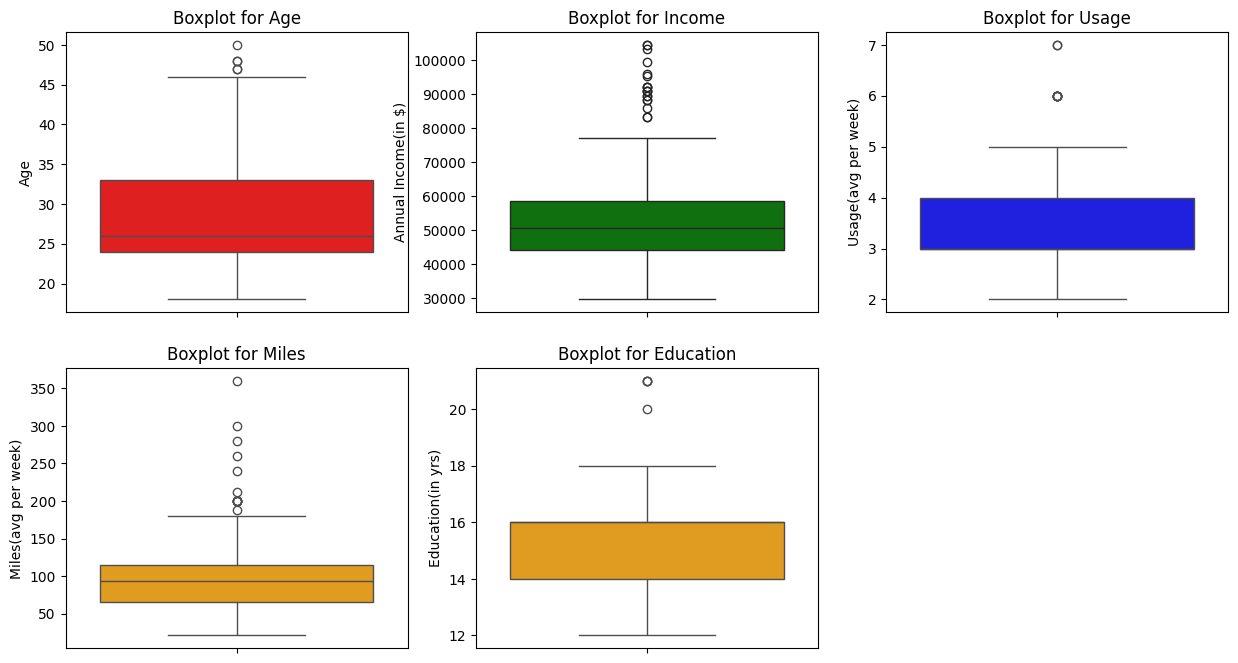

In [16]:
plt.figure(figsize=(15,8)) # creating subplots to identify outliers for each fields described
plt.subplot(2,3,1)
sns.boxplot(y=df['Age'],color='red')
plt.title('Boxplot for Age')
plt.subplot(2,3,2)
sns.boxplot(y=df['Annual Income(in $)'],color='green')
plt.title('Boxplot for Income')
plt.subplot(2,3,3)
sns.boxplot(y=df['Usage(avg per week)'],color='blue')
plt.title('Boxplot for Usage')
plt.subplot(2,3,4)
sns.boxplot(y=df['Miles(avg per week)'],color='orange')
plt.title('Boxplot for Miles')
plt.subplot(2,3,5)
sns.boxplot(y=df['Education(in yrs)'],color='orange')
plt.title('Boxplot for Education')
plt.show()

In [17]:
df.describe()

,Age,Education(in yrs),Usage(avg per week),Fitness level,Annual Income(in $),Miles(avg per week),Selling Price(in $)
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444,1805.555556
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605,387.978895
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000,1500.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000,1500.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000,1750.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000,1750.000000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000,2500.000000


In [18]:
sd = df.describe()
diff_of_mean_median = round(sd.loc['mean'] - sd.loc['50%'],2)
diff_of_mean_median # getting difference between mean and median to get the idea of skewness in the dataset

,0
Age,2.79
Education(in yrs),-0.43
Usage(avg per week),0.46
Fitness level,0.31
Annual Income(in $),3123.08
Miles(avg per week),9.19
Selling Price(in $),55.56


### Age and Usage has few outliers as compared to Income and Miles. Data in Age and Usage are more concentrated as data in Income and Miles has a larger spreadover with large amount of outliers.

### **2. Effects of MaritalStatus, Age, Education, Usage, Fitness, Income and Miles on Product purchased.**

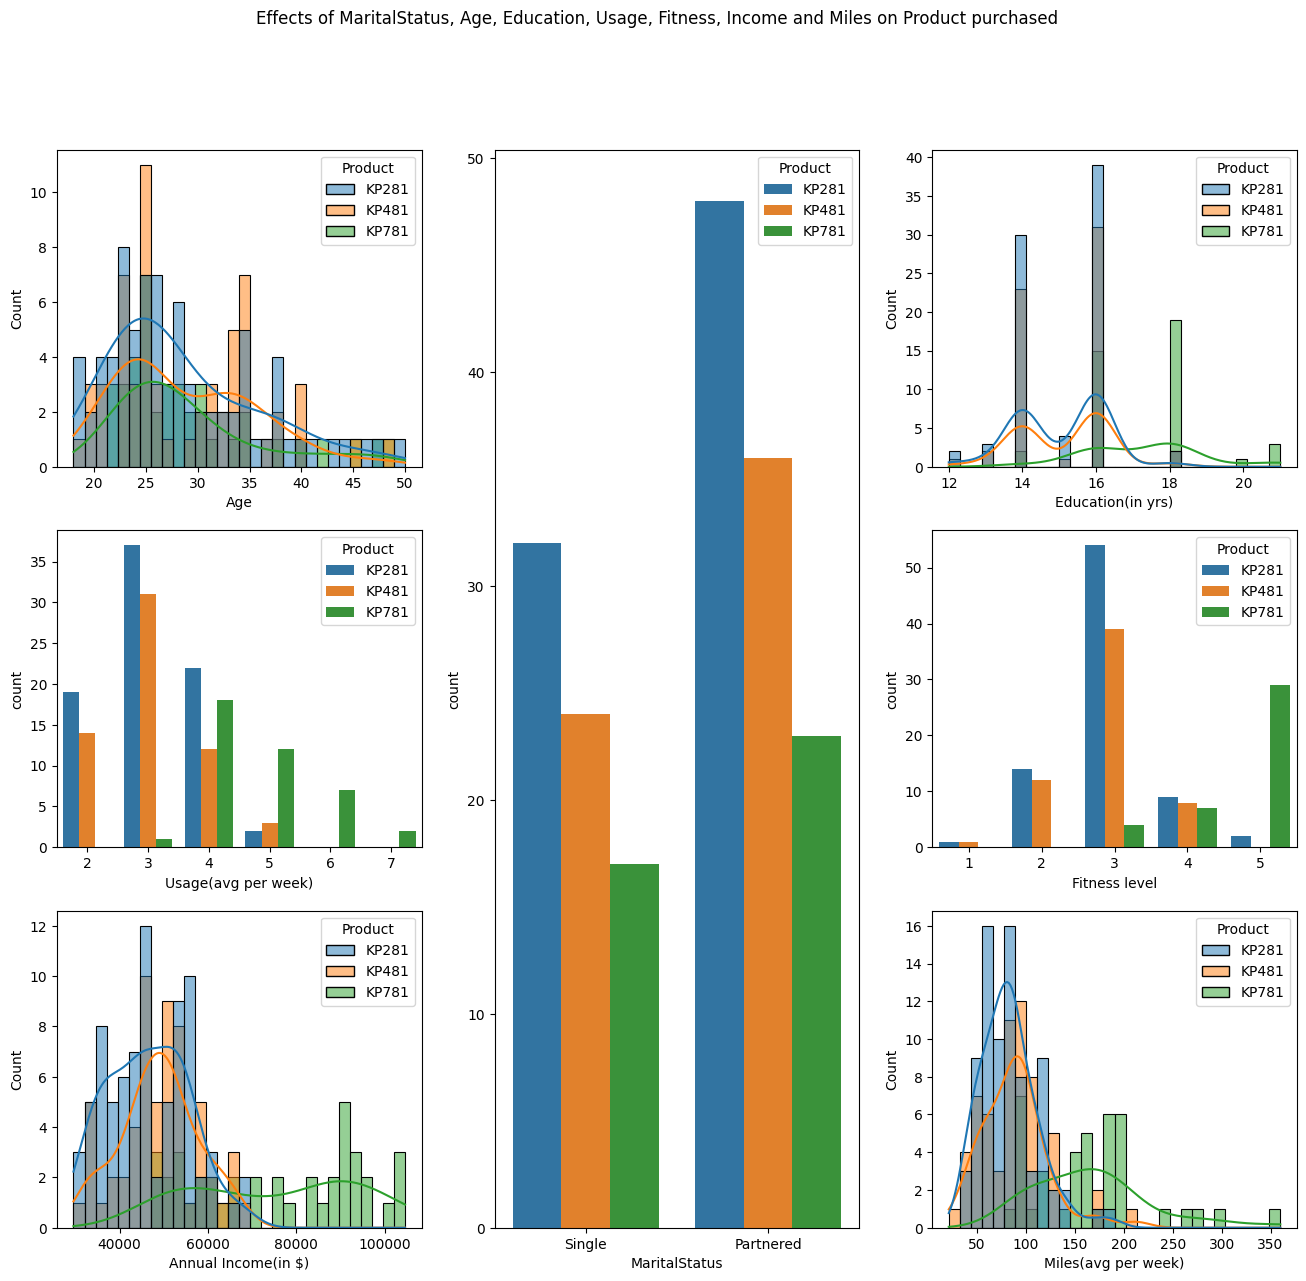

In [19]:
plt.figure(figsize=(16,14)) # analyzing different products and their effects on other fields
plt.subplot(3,3,1)
sns.histplot(data=df,x='Age',bins=30,hue='Product',kde=True)
plt.subplot(3,3,3)
sns.histplot(data=df,x='Education(in yrs)',bins=30,hue='Product',kde=True)
plt.subplot(3,3,4)
sns.countplot(data=df,x='Usage(avg per week)',hue='Product')
plt.subplot(3,3,6)
sns.countplot(data=df,x='Fitness level',hue='Product')
plt.subplot(3,3,7)
sns.histplot(data=df,x='Annual Income(in $)',bins=30,hue='Product',kde=True)
plt.subplot(3,3,9)
sns.histplot(data=df,x='Miles(avg per week)',bins=30,hue='Product',kde=True)
plt.subplot(1,3,2)
sns.countplot(data=df,x='MaritalStatus',hue='Product')
plt.suptitle('Effects of MaritalStatus, Age, Education, Usage, Fitness, Income and Miles on Product purchased')
plt.show()

---
**Age** - KP281 treadmill has majority over people of age group of 20-35, compared to other treadmills.

---
**Education** - KP281 treadmill has majority over people of 14 - 16 years of education but there is a significant rise of KP781 treadmill over people of 18 years of education.

---
**Usage** - KP281 treadmill has majority over people using treadmill upto 4 times a week, but above it people like to prefer KP781 treadmill.

---
**Fitness** - KP281 treadmill has majority over people of fitness upto 4, but above it people like to prefer KP781 treadmill.

---
**Income** - KP281 treadmill has majority over people having their salary upto 70000$ per annum, but above it people like to prefer KP781 treadmill.

---
**Miles** - KP281 treadmill has majority over people having their running upto 200 miles on avearge, but above it people like to prefer KP781 treadmill.

---
**Marital Status** - KP281 treadmill has majority over all the people whether they are single or partnered.








### **3. What percent of customers have purchased KP281, KP481, or KP781 treadmill**

In [20]:
product_counts = round(pd.crosstab(index=df['Product'], columns='percentage',normalize='columns')*100,2) # calculating probability for customers purchased different products
product_counts

col_0,percentage
Product,
KP281,44.44
KP481,33.33
KP781,22.22


### 44.44% of people purchased KP281, followed by 33.33% purchased KP481, and by 22.22% purchased KP781.

### **4. What percent of female customers have purchased KP281:**

In [21]:
prob_female_KP281 = round(pd.crosstab(index=df['Gender'],columns=df['Product'],normalize='index')*100,2)
prob_female_KP281.loc['Female', 'KP281']

52.63

### Approximately 52.63% of female customers purchased KP281 treadmill

### **5. What percent of Single customers have purchased KP781:**

In [22]:
prob_single_KP781 = round(pd.crosstab(index=df['MaritalStatus'],columns=df['Product'],normalize='index')*100,2)
prob_single_KP781.loc['Single','KP781']

23.29

### Approximately 23.29% of single customers purchased KP781 treadmill

### **6. Probability of a male customer buying a KP781 treadmill**

In [23]:
prob_male_KP781 = round(pd.crosstab(index=df['Gender'],columns=df['Product'],normalize='index')*100,2)
prob_male_KP781.loc['Male', 'KP781']

31.73

### Approximately 31.73% of male customers purchased KP781 treadmill

### **7. Correlation among different factors using pair plots**

<Figure size 1200x800 with 0 Axes>

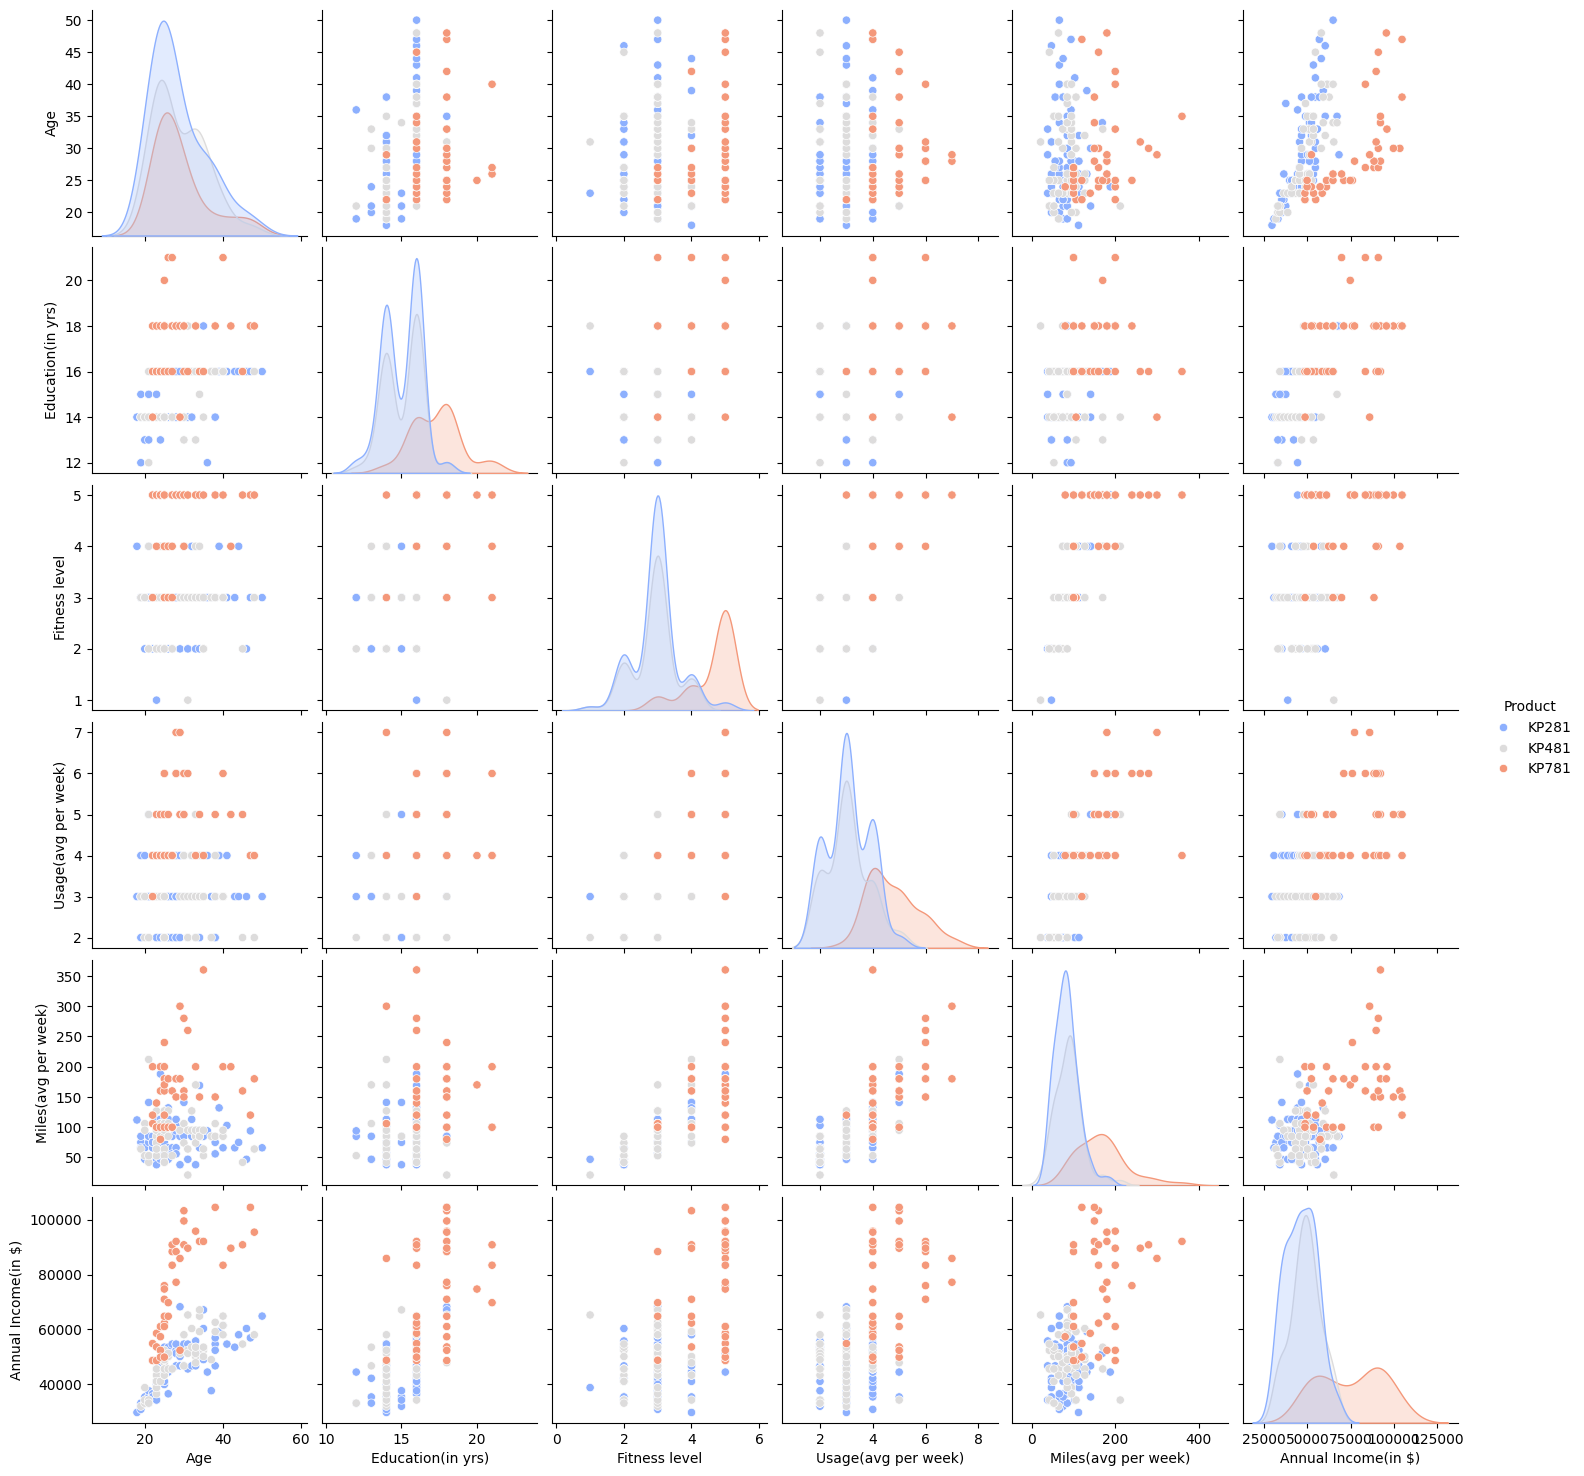

In [24]:
corr_data = df[['Age','Education(in yrs)','Fitness level','Usage(avg per week)','Miles(avg per week)','Annual Income(in $)','Product']]
plt.figure(figsize=(12, 8))
sns.pairplot(data=corr_data, hue='Product',palette='coolwarm')
plt.show()

### Above are the correlation among different factors using pair plots

### **8. Customer Profiling - Categorization of users**

### **For 'KP281'**


In [25]:
KP281 = df[df['Product']=='KP281'][['Product','Age','Gender','Education(in yrs)','MaritalStatus','Usage(avg per week)','Fitness level','Annual Income(in $)','Miles(avg per week)']]
KP281.shape[0]

80

### 80 entries for KP281

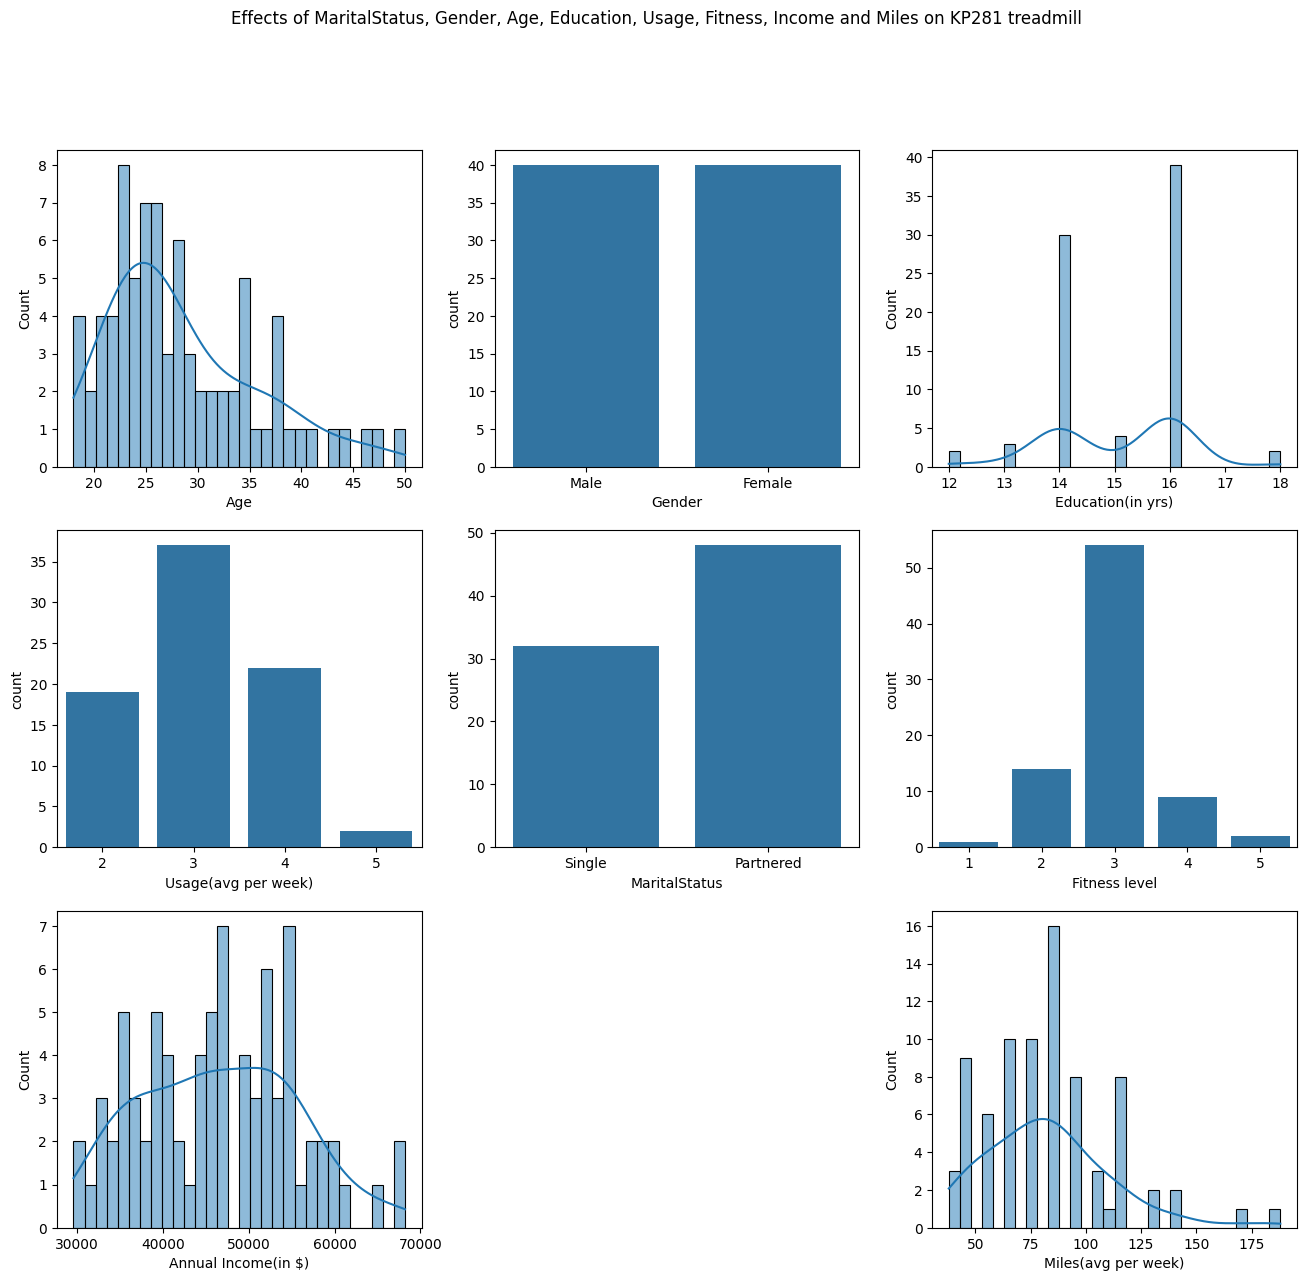

In [26]:
plt.figure(figsize=(16,14))
plt.subplot(3,3,1)
sns.histplot(data=KP281,x='Age',bins=30,kde=True)
plt.subplot(3,3,2)
sns.countplot(data=KP281,x='Gender')
plt.subplot(3,3,3)
sns.histplot(data=KP281,x='Education(in yrs)',bins=30,kde=True)
plt.subplot(3,3,4)
sns.countplot(data=KP281,x='Usage(avg per week)')
plt.subplot(3,3,6)
sns.countplot(data=KP281,x='Fitness level')
plt.subplot(3,3,7)
sns.histplot(data=KP281,x='Annual Income(in $)',bins=30,kde=True)
plt.subplot(3,3,9)
sns.histplot(data=KP281,x='Miles(avg per week)',bins=30,kde=True)
plt.subplot(3,3,5)
sns.countplot(data=KP281,x='MaritalStatus')
plt.suptitle('Effects of MaritalStatus, Gender, Age, Education, Usage, Fitness, Income and Miles on KP281 treadmill')
plt.show()

### **Customers choosing KP281 treadmill are :-**



*   People mostly having age around 18 to 35
*   People mostly having 14 and 16 yrs of education
*   People mostly equal among male and female
*   People mostly having average usage of around 3 times a week
*   People mostly partnered
*   People mostly having fitness level of 3
*   People mostly having annual salary from 38000- 56000 dollars
*   People mostly having average run of 80 miles a week





### **For 'KP481'**

In [27]:
KP481 = df[df['Product']=='KP481'][['Product','Age','Gender','Education(in yrs)','MaritalStatus','Usage(avg per week)','Fitness level','Annual Income(in $)','Miles(avg per week)']]
KP481.shape[0]

60

### 60 entries for KP481

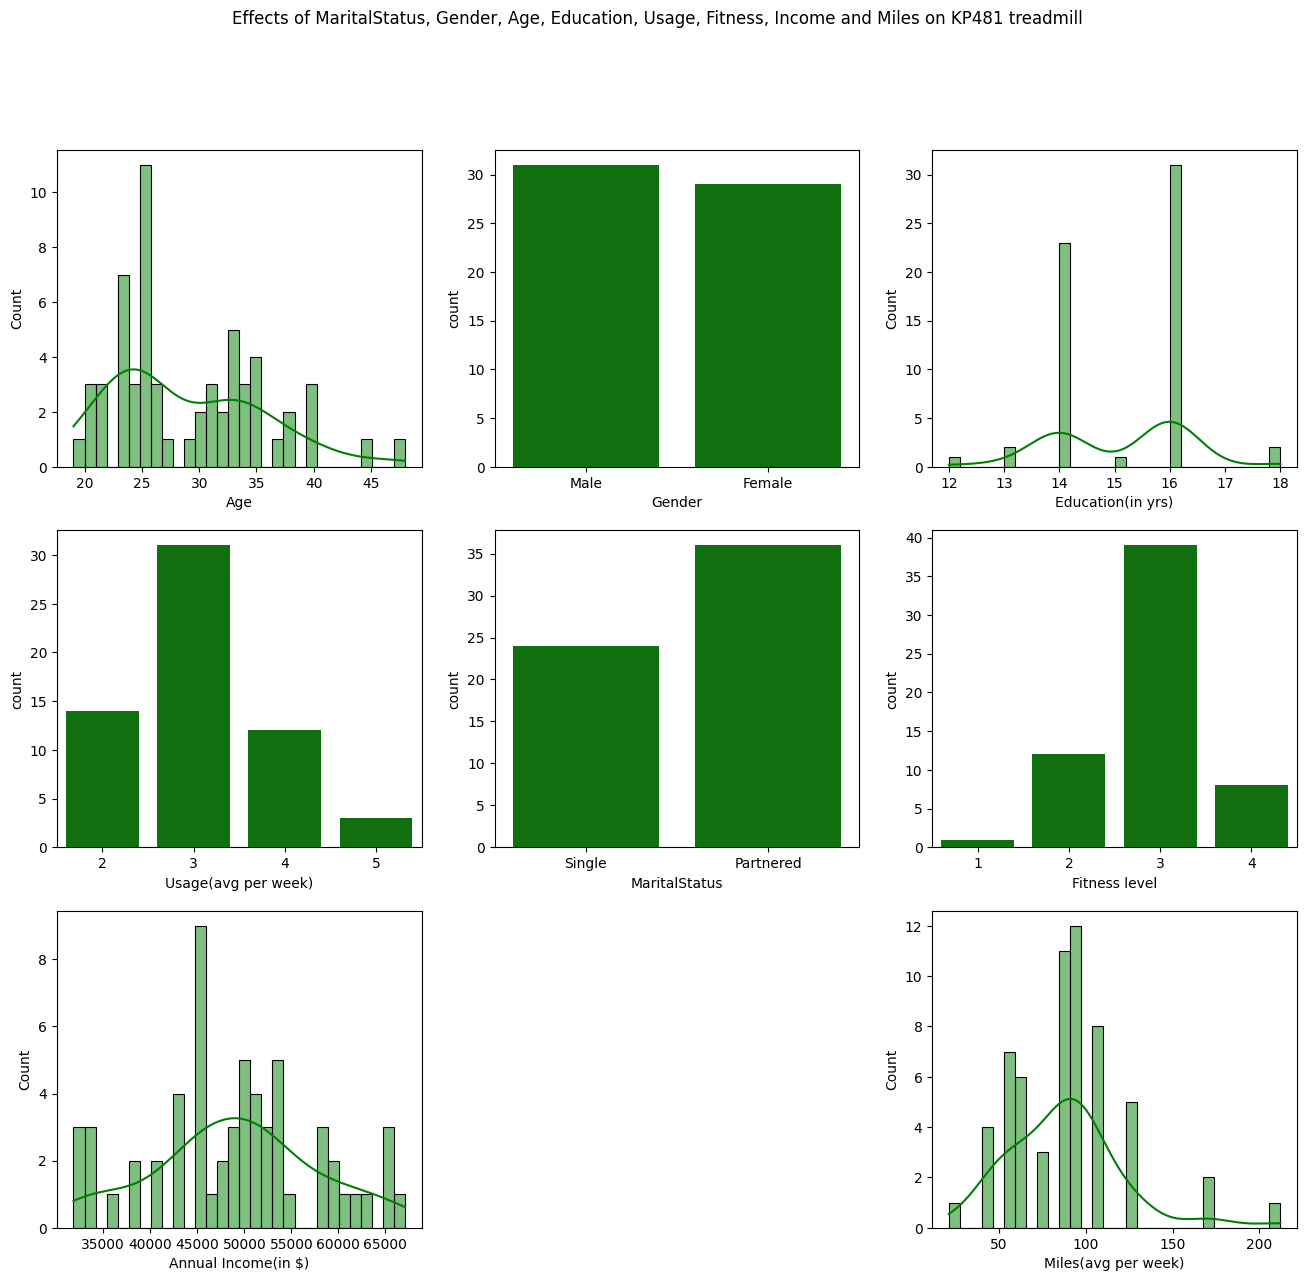

In [28]:
plt.figure(figsize=(16,14))
plt.subplot(3,3,1)
sns.histplot(data=KP481,x='Age',bins=30,kde=True,color='green')
plt.subplot(3,3,2)
sns.countplot(data=KP481,x='Gender',color='green')
plt.subplot(3,3,3)
sns.histplot(data=KP481,x='Education(in yrs)',bins=30,kde=True,color='green')
plt.subplot(3,3,4)
sns.countplot(data=KP481,x='Usage(avg per week)',color='green')
plt.subplot(3,3,6)
sns.countplot(data=KP481,x='Fitness level',color='green')
plt.subplot(3,3,7)
sns.histplot(data=KP481,x='Annual Income(in $)',bins=30,kde=True,color='green')
plt.subplot(3,3,9)
sns.histplot(data=KP481,x='Miles(avg per week)',bins=30,kde=True,color='green')
plt.subplot(3,3,5)
sns.countplot(data=KP481,x='MaritalStatus',color='green')
plt.suptitle('Effects of MaritalStatus, Gender, Age, Education, Usage, Fitness, Income and Miles on KP481 treadmill')
plt.show()

### **Customers choosing KP481 treadmill are :-**



*   People mostly having age around 25 yrs
*   People mostly having 14 and 16 yrs of education
*   People mostly male
*   People mostly having average usage of around 3 times a week
*   People mostly partnered
*   People mostly having fitness level of 3
*   People mostly having annual salary from 50000 dollars
*   People mostly having average run of 100 miles a week

### **For 'KP781'**

In [29]:
KP781 = df[df['Product']=='KP781'][['Product','Age','Gender','Education(in yrs)','MaritalStatus','Usage(avg per week)','Fitness level','Annual Income(in $)','Miles(avg per week)']]
KP781.shape[0]

40

### 40 entries for KP781

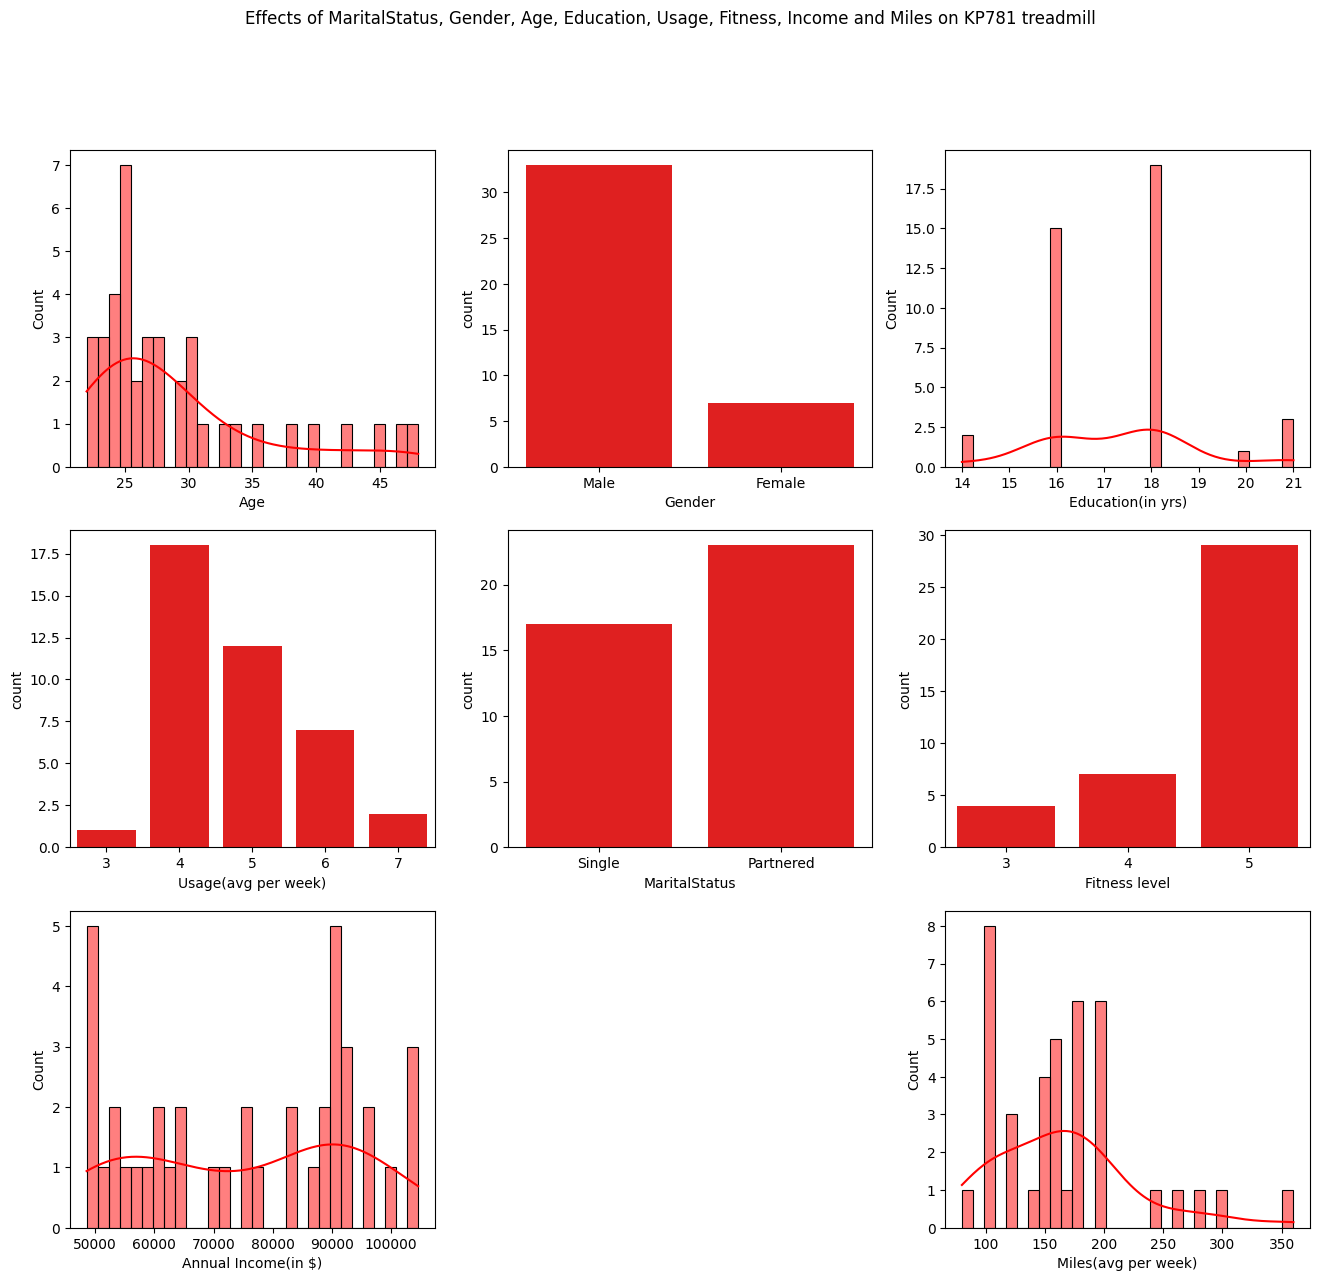

In [30]:
plt.figure(figsize=(16,14))
plt.subplot(3,3,1)
sns.histplot(data=KP781,x='Age',bins=30,kde=True,color='red')
plt.subplot(3,3,2)
sns.countplot(data=KP781,x='Gender',color='red')
plt.subplot(3,3,3)
sns.histplot(data=KP781,x='Education(in yrs)',bins=30,kde=True,color='red')
plt.subplot(3,3,4)
sns.countplot(data=KP781,x='Usage(avg per week)',color='red')
plt.subplot(3,3,6)
sns.countplot(data=KP781,x='Fitness level',color='red')
plt.subplot(3,3,7)
sns.histplot(data=KP781,x='Annual Income(in $)',bins=30,kde=True,color='red')
plt.subplot(3,3,9)
sns.histplot(data=KP781,x='Miles(avg per week)',bins=30,kde=True,color='red')
plt.subplot(3,3,5)
sns.countplot(data=KP781,x='MaritalStatus',color='red')
plt.suptitle('Effects of MaritalStatus, Gender, Age, Education, Usage, Fitness, Income and Miles on KP781 treadmill')
plt.show()

### **Customers choosing KP781 treadmill are :-**



*   People mostly having age around 18 yrs
*   People mostly having wide range of education, therefore it is difficult to tell suitable customers for this category
*   People having majority among male
*   People mostly having average usage of around 4 times a week
*   People mostly partnered
*   People mostly having fitness level of 5
*   People mostly having annual salary from 90000 dollars
*   People mostly having average run of 150 - 200 miles a week

# Recommendations and Insights

*   All the 3 products have a strong influence on people of age 18-30, as being young people need to be fit for atttending long scheduled office works, and classes.
*   Customers that are having education of 14 and 16 yrs focusses on KP281 and KP481 as they are more cheap as compared to KP781, but the ones having 18 yrs of education knows the more expensive the product will be , more valuable and dependent it will be.
*   Male customers tend to show a high interest in KP781 as compared to other products, so it will be a good point of interest to cater and influenze them to buy one.
*   Customers are also interested in getting product which can handle more hrs of duration as per the needs of each customer, therefore people having average run of 2-3 times a week, prefer KP281 and KP481 treadmill, where as people with  having average run of more than 4 times a week, prefer KP781.
*   Customers also shows more intrested in partnered workout so, special discounts can be run to grab attention to couples to buy the product.
*   Fitness level also pays a great value in getting correct customer acquisition as fitness level upto 3 can be choose KP281 or KP481, but above 3 there is a chance that poeople might prefer KP781 according to their needs and goals.
*   Products must be catered according to the annual salary of the customers as KP281 must be recommended to people having annual salary 38000- 56000 dollars, KP481 must be recommended to people having annual salary 50000 dollars, whereas KP781 must be recommended to people having annual salary 90000 dollars.
*   Products must be catered according to the average running per week of the customers as KP281 must be recommended to people having average running per week of 80 miles , KP481 must be recommended to people having average running per week of 100 miles, whereas KP781 must be recommended to people having average running per week of 150- 200 miles, this is the product to be catered t hotels gyms etc , not to the individuals.
   

